In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "nomanshafqat" # username from the json file
os.environ['KAGGLE_KEY'] = "a22e8cc322683d0d4d4d3e2ad7121b66" # key from the json file
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia # api copied from kaggle

100% 2.29G/2.29G [00:46<00:00, 42.9MB/s]
100% 2.29G/2.29G [00:46<00:00, 52.5MB/s]


In [2]:
!ls

chest-xray-pneumonia.zip  sample_data


In [3]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [5]:
from keras.preprocessing.image import ImageDataGenerator


train_dir= "chest_xray/train"
test_dir= "chest_xray/test"
validation_dir= "chest_xray/val"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(256, 256), 
                                                    batch_size=5,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(256, 256),
                                                        batch_size=5,
                                                        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=5,
                                                        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Using test set as validation since validation set only contains 16 images

In [6]:
import keras
from keras.layers import  GlobalAveragePooling2D,Dropout,Dense
from keras.models import Model
from keras.optimizers import Adam

base_model= keras.applications.resnet.ResNet50(include_top=False, input_shape= (256,256,3),weights=None, classes=1)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
model.summary()
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(),
              metrics=['acc'])













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256        

In [11]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=400,
                              epochs=10,
                              validation_data=test_generator,
                              validation_steps=50)

Epoch 1/10
400/400 [==============================] - 72s 181ms/step - loss: 3.9697 - acc: 0.7510 - val_loss: 5.5480 - val_acc: 0.6520
Epoch 2/10
400/400 [==============================] - 72s 181ms/step - loss: 4.0653 - acc: 0.7450 - val_loss: 6.1219 - val_acc: 0.6160
Epoch 3/10
400/400 [==============================] - 72s 181ms/step - loss: 4.0972 - acc: 0.7430 - val_loss: 6.5306 - val_acc: 0.5904
Epoch 4/10
400/400 [==============================] - 72s 181ms/step - loss: 4.1370 - acc: 0.7405 - val_loss: 5.4204 - val_acc: 0.6600
Epoch 5/10
400/400 [==============================] - 72s 181ms/step - loss: 4.1450 - acc: 0.7400 - val_loss: 6.2745 - val_acc: 0.6064
Epoch 6/10
400/400 [==============================] - 72s 181ms/step - loss: 4.0573 - acc: 0.7455 - val_loss: 5.9306 - val_acc: 0.6280
Epoch 7/10
400/400 [==============================] - 72s 180ms/step - loss: 4.0733 - acc: 0.7445 - val_loss: 6.3132 - val_acc: 0.6040
Epoch 8/10
400/400 [==============================] - 7

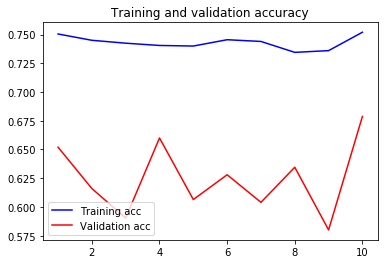

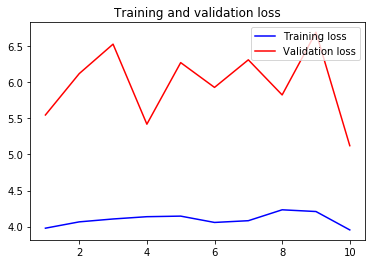

In [12]:
model.save('weights.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()